# TIENDA EN LÍNEA INTERNACIONAL

# Test A/B

**Carlos Esteban Ortiz Espitia**
Analista de Datos 


# Introducción

En el entorno competitivo del e-commerce, optimizar la experiencia del usuario puede marcar la diferencia en las tasas de conversión. Para este propósito, La **tienda en línea internacional** ha desarrollado un nuevo sistema de recomendaciones con el fin de mejorar la navegación del cliente y fomentar las compras. Para validar su efectividad, se ha llevado a cabo una prueba A/B con un grupo control (A) y un grupo experimental (B), durante un periodo definido en diciembre de 2020. Este estudio tiene como finalidad evaluar el impacto de dicho sistema en las distintas etapas del embudo de conversión, desde la vista del producto hasta la compra final.


# Objetivo General

Evaluar si la implementación de un sistema de recomendaciones mejorado incrementa significativamente la conversión de los usuarios en las etapas clave del embudo de ventas en al menos un 10%, durante los 14 días posteriores al registro del usuario.

#  Objetivos Específicos

1. Explorar y preparar los datos disponibles:
Verificar la calidad de los datos, identificar y corregir posibles inconsistencias, valores nulos o duplicados, y asegurar la correcta tipificación de columnas para su análisis.

2. Realizar un análisis exploratorio de datos (EDA):
Analizar la distribución de los eventos por usuario, el comportamiento temporal de los eventos, y la representatividad de los grupos A y B para entender el contexto de la prueba.

3. Medir las tasas de conversión en cada etapa del embudo:
Calcular las proporciones de usuarios que pasaron de `product_page` a `product_card`, y de `product_card` a `purchase` para cada grupo.

4. Evaluar estadísticamente los resultados de la prueba A/B:
Aplicar pruebas estadísticas (z-test de proporciones) para determinar si las diferencias observadas entre los grupos son estadísticamente significativas y cumplen con el umbral del 10% de mejora esperado.

5. Conclusiones y formular recomendaciones:
Determinar si el sistema de recomendaciones debe implementarse para toda la audiencia o si se requiere una nueva iteración o prueba.

# Desarrollo del proyecto 

## Carga de datos 

In [43]:
# Importar librerias 
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
from statsmodels.stats.proportion import proportions_ztest


In [44]:

mkt_events = pd.read_csv('/Users/carlosortiz/Desktop/Data_Analyst/14_Sprint_Proyecto_Final/Prueba_A-B/ab_project_marketing_events_us.csv')
events = pd.read_csv('/Users/carlosortiz/Desktop/Data_Analyst/14_Sprint_Proyecto_Final/Prueba_A-B/final_ab_events_upd_us.csv')
users = pd.read_csv('/Users/carlosortiz/Desktop/Data_Analyst/14_Sprint_Proyecto_Final/Prueba_A-B/final_ab_new_users_upd_us.csv')
part = pd.read_csv('/Users/carlosortiz/Desktop/Data_Analyst/14_Sprint_Proyecto_Final/Prueba_A-B/final_ab_participants_upd_us.csv')

## Preparación de datos 

In [45]:
mkt_events.head() 

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


In [46]:
mkt_events.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 580.0+ bytes


In [47]:
events.head()


,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In [48]:
events['event_name'].unique()

array(['purchase', 'product_cart', 'product_page', 'login'], dtype=object)

In [49]:
events.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB


In [50]:
users.head()


,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


In [51]:
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [52]:
users['user_id'].nunique()

58703

In [53]:
part.head()


,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test


In [54]:
part.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB


## Análisis exploratorio de datos (EDA)

In [55]:
# Camnbio de tipo de fechas 
mkt_events['start_dt']=pd.to_datetime(mkt_events['start_dt'], format='%Y-%M-%d')

events['event_dt']=pd.to_datetime(events['event_dt'], errors='coerce')
events['event_date'] = events['event_dt'].dt.date
events['event_date']=pd.to_datetime(events['event_date'], errors='coerce')
events['event_time'] = events['event_dt'].dt.time

users['first_date']=pd.to_datetime(users['first_date'])


In [56]:
# Reemplaza los valores ausentes de la columna details
events['details'] = events['details'].fillna(0)


Se convirtieron correctamente las columnas de fechas (start_dt, event_dt, first_date) al tipo datetime para permitir análisis confiables. Además, se separaron la fecha (event_date) y la hora (event_time) de los eventos para facilitar análisis por día y hora. Finalmente, los valores ausentes en la columna details fueron reemplazados por 0, permitiendo un manejo uniforme de los datos numéricos asociados a los eventos.

## Preparacion de datos para Test A/B

In [57]:
part.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB


In [58]:
recommender_users = part[part['ab_test'] == 'recommender_system_test']
interface_users = part[part['ab_test'] == 'interface_eu_test']

sh= set(recommender_users['user_id']).intersection(set(interface_users['user_id']))
part_r = recommender_users[~recommender_users['user_id'].isin(sh)]


part_r=part[part['ab_test']=='recommender_system_test']
part_r.shape[0]

3675

In [59]:
part_a=part_r[part_r['group'] == 'A']
part_b=part_r[part_r['group'] == 'B']

In [60]:
print(part_a['user_id'].nunique())
print(part_b['user_id'].nunique())

2747
928


In [61]:
dupl= set(part_b['user_id']).intersection(set(part_a['user_id']))


In [62]:
part_a_filtered= part_a[~part_a['user_id'].isin(dupl)]
part_a_filtered=part_a_filtered.reset_index(drop=True)
part_a_filtered

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test
...,...,...,...
2742,15E18335C5DB30C9,A,recommender_system_test
2743,CA6994E92085D1C5,A,recommender_system_test
2744,94786EB776B45914,A,recommender_system_test
2745,053FB26D6D49EDDC,A,recommender_system_test


In [63]:
part_b_filtered= part_b[~part_b['user_id'].isin(dupl)]
part_b_filtered=part_b_filtered.reset_index(drop=True)
part_b_filtered

,user_id,group,ab_test
0,CD74C3D22FFC09C2,B,recommender_system_test
1,50AA023EF325BCA1,B,recommender_system_test
2,EAFB9027A27D510C,B,recommender_system_test
3,5D5E6EE92AF6E9E0,B,recommender_system_test
4,52E7B7DC39F52987,B,recommender_system_test
...,...,...,...
923,1E6B9298415AA97A,B,recommender_system_test
924,6DC46FD66C7F126B,B,recommender_system_test
925,9D263B8EF15CF188,B,recommender_system_test
926,29C92313A98B1176,B,recommender_system_test


In [64]:
users_filtered=users[users['user_id'].isin(part_r['user_id'])]
users_filtered

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
19,DD4352CDCF8C3D57,2020-12-07,EU,Android
22,831887FE7F2D6CBA,2020-12-07,EU,Android
38,4CB179C7F847320B,2020-12-07,EU,iPhone
39,29C92313A98B1176,2020-12-07,APAC,Android
...,...,...,...,...
58652,3CA972F86411CF13,2020-12-20,EU,PC
58656,A09DFE27D4CFF8E8,2020-12-20,EU,Android
58664,0F7D49FC184EDCDE,2020-12-20,EU,PC
58680,574ACBC674BC385D,2020-12-20,EU,Mac


In [65]:
events_filtered=events[events['user_id'].isin(part_r['user_id'])]
events_filtered=events.merge(part_r[['user_id', 'group']], on= 'user_id', how='inner')
events_filtered=events_filtered.merge(users_filtered[['user_id', 'first_date']], on= 'user_id', how='inner')
users_filtered=users.merge(part_r[['user_id', 'group']], on= 'user_id', how='inner')
events_filtered


,user_id,event_dt,event_name,details,event_date,event_time,group,first_date
0,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99,2020-12-07,06:50:29,A,2020-12-07
1,3C5DD0288AC4FE23,2020-12-07 19:42:40,purchase,4.99,2020-12-07,19:42:40,A,2020-12-07
2,49EA242586C87836,2020-12-07 06:31:24,purchase,99.99,2020-12-07,06:31:24,B,2020-12-07
3,2B06EB547B7AAD08,2020-12-07 21:36:38,purchase,4.99,2020-12-07,21:36:38,A,2020-12-07
4,A640F31CAC7823A6,2020-12-07 18:48:26,purchase,4.99,2020-12-07,18:48:26,B,2020-12-07
...,...,...,...,...,...,...,...,...
23904,D21F0D4FDCD82DB2,2020-12-29 02:17:00,login,0.00,2020-12-29,02:17:00,A,2020-12-20
23905,96BDD55846D1F7F6,2020-12-29 16:53:42,login,0.00,2020-12-29,16:53:42,A,2020-12-20
23906,553BAE96C6EB6240,2020-12-29 14:09:14,login,0.00,2020-12-29,14:09:14,A,2020-12-20
23907,DD4352CDCF8C3D57,2020-12-30 12:42:56,login,0.00,2020-12-30,12:42:56,B,2020-12-07


In [66]:
users_filtered

,user_id,first_date,region,device,group
0,D72A72121175D8BE,2020-12-07,EU,PC,A
1,DD4352CDCF8C3D57,2020-12-07,EU,Android,B
2,831887FE7F2D6CBA,2020-12-07,EU,Android,A
3,4CB179C7F847320B,2020-12-07,EU,iPhone,B
4,29C92313A98B1176,2020-12-07,APAC,Android,B
...,...,...,...,...,...
3670,3CA972F86411CF13,2020-12-20,EU,PC,A
3671,A09DFE27D4CFF8E8,2020-12-20,EU,Android,B
3672,0F7D49FC184EDCDE,2020-12-20,EU,PC,A
3673,574ACBC674BC385D,2020-12-20,EU,Mac,A


Luego del preprocesamiento inicial de los datos, se identificó que el conjunto de participantes `final_ab_participants_upd_us.csv` incluía usuarios asignados a más de un experimento A/B, entre ellos `recommender_system_test` e `interface_eu_test`. Esto representaba un riesgo, ya que podría generar sesgos o efectos cruzados si los usuarios formaban parte de más de una prueba a la vez.

Para asegurar la validez del experimento y la independencia de los grupos, se decidió filtrar exclusivamente los usuarios que participaron en el test `recommender_system_test`. Además, se realizó una verificación adicional para excluir cualquier usuario que apareciera tanto en el grupo de control (A) como en el grupo experimental (B), conservando únicamente a quienes estaban asignados a un solo grupo dentro de este experimento específico.

Una vez identificados los participantes válidos del test, se procedió a filtrar los datos restantes (users, events, participants) para que incluyeran únicamente a estos usuarios. Esto garantizó que todas las observaciones posteriores correspondieran solo al experimento en estudio y a los usuarios correctamente asignados.

Finalmente, se consolidaron los distintos DataFrames en una única tabla maestra llamada `events_filtered`, mediante la combinación (merge) de los datos de eventos, información de usuario y asignación a grupo A/B. Esta tabla estructurada sirve como base para todo el análisis posterior del embudo de conversión, pruebas estadísticas y visualizaciones.

## Análisis de datos

### Ingresos Acumulado por Grupo

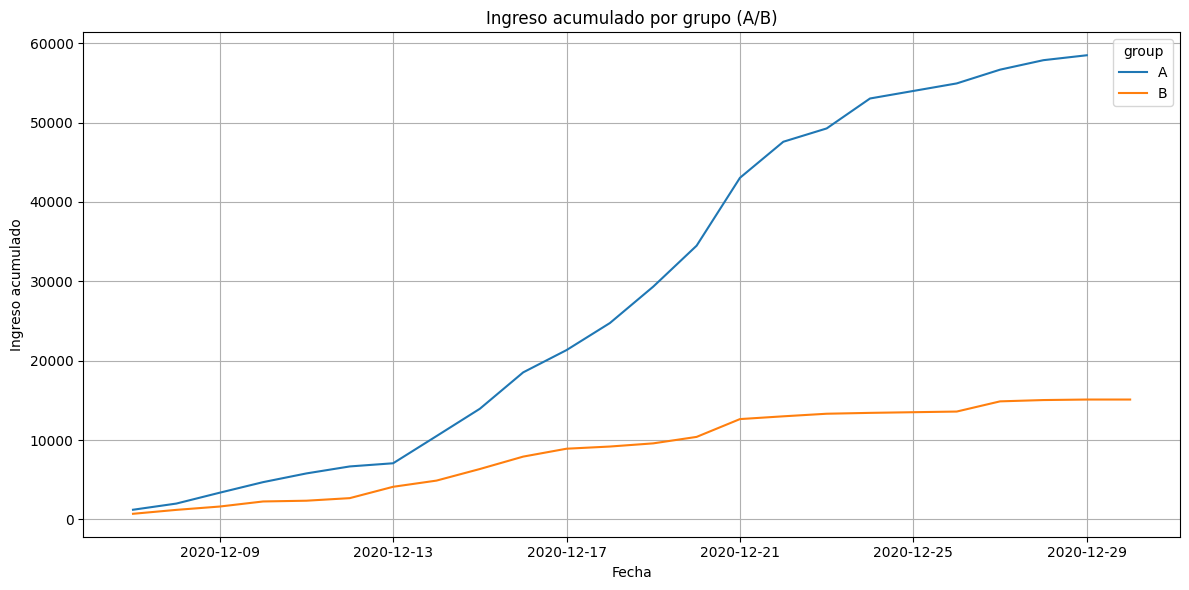

In [67]:
cum_revenue = events_filtered.groupby(['event_date', 'group'])['details'].sum().reset_index()
cum_revenue['cumulative_revenue'] = cum_revenue.groupby('group')['details'].cumsum()


plt.figure(figsize=(12,6))
sns.lineplot(data=cum_revenue, x='event_date', y='cumulative_revenue', hue='group')
plt.title('Ingreso acumulado por grupo (A/B)')
plt.xlabel('Fecha')
plt.ylabel('Ingreso acumulado')
plt.grid(True)
plt.tight_layout()
plt.show()

Durante el periodo de análisis definido entre el 7 de diciembre de 2020 y el 1 de enero de 2021, se observó que el grupo A generó un ingreso acumulado significativamente mayor en comparación con el grupo B. Específicamente, los ingresos totales para el grupo A superaron los 60,000 unidades monetarias, mientras que el grupo B acumuló aproximadamente 15,000.

Durante los primeros cinco días del experimento, es decir, hasta el 13 de diciembre, los grupos A y B presentan un crecimiento similar en términos de ingresos acumulados. Esto sugiere que, en la etapa inicial, el comportamiento de compra entre ambos grupos era comparable, sin diferencias notorias atribuibles al nuevo sistema de recomendaciones. Sin embargo, a partir del 13 de diciembre, se evidencia un aumento exponencial en los ingresos del grupo A, mientras que el grupo B continúa con un crecimiento más constante y moderado

Esta diferencia en ingresos no puede interpretarse directamente como un mejor rendimiento del grupo A, ya que existe un desbalance en el tamaño de los grupos: el grupo A cuenta con casi tres veces más usuarios que el grupo B. Esta disparidad se debe al diseño del experimento original, donde el reparto entre los grupos no fue equitativo.

Por lo tanto, para realizar una comparación justa entre grupos, es fundamental evaluar métricas relativas, como el ingreso promedio por usuario y  aplicar pruebas estadísticas, en lugar de basarse en los valores absolutos de ingresos.

### Distribución de valores de compras 

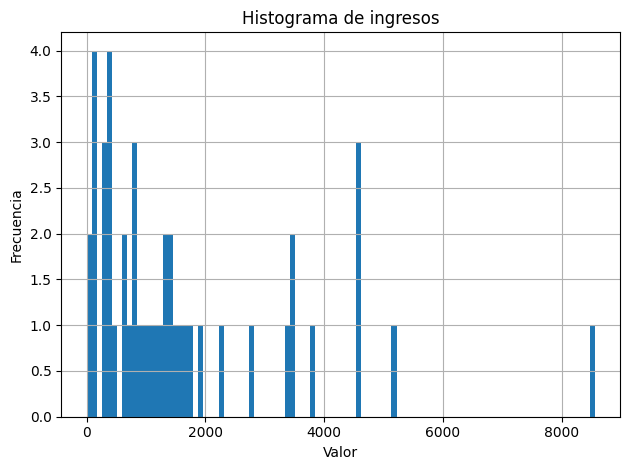

In [68]:
plt.hist(cum_revenue['details'],bins=100)
plt.title('Histograma de ingresos')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.tight_layout()
plt.show()

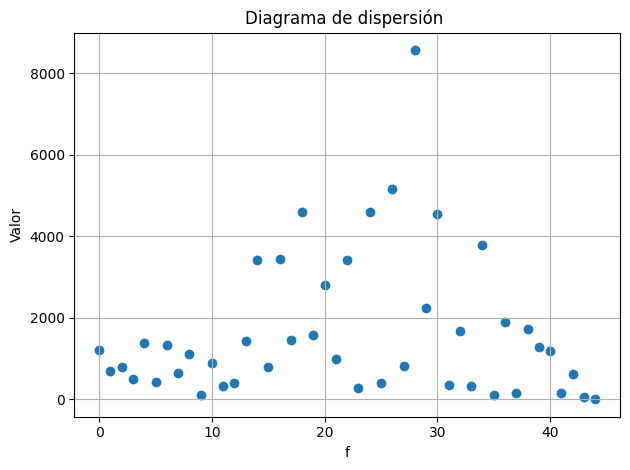

In [69]:
x_values = pd.Series(range(0,len(cum_revenue)))
plt.scatter(x_values, cum_revenue['details'])
plt.title('Diagrama de dispersión ')
plt.xlabel('f')
plt.ylabel('Valor')
plt.grid(True)
plt.tight_layout()
plt.show()

Al analizar la distribución de los valores monetarios asociados a las compras realizadas durante el periodo de prueba, se observa que la mayoría de los usuarios realizaron compras por montos iguales o inferiores a 2,000. Este comportamiento sugiere que los usuarios tienden a realizar compras moderadas, probablemente asociadas a productos de bajo o mediano costo.

Además, se identifican algunas compras aisladas por valores cercanos a los 4,000, lo que podría reflejar comportamientos puntuales de usuarios con mayor promedio o compras múltiples en una sola transacción.

Finalmente, se destaca un único caso de compra con un valor superior a 8,000, que puede considerarse un valor atípico dentro de la distribución general. Este tipo de comportamiento extremo debe tomarse con precaución al calcular métricas como el ingreso promedio.


### Pedidos diarios

In [70]:
pedidos_diarios = events_filtered.groupby(['event_date', 'group'])['user_id'].nunique().reset_index()
pedidos_diarios.rename(columns={'user_id': 'pedidos'}, inplace=True)
pedidos_diarios['cumulative_orders'] = pedidos_diarios.groupby('group')['pedidos'].cumsum()
pedidos_diarios.head()

,event_date,group,pedidos,cumulative_orders
0,2020-12-07,A,154,154
1,2020-12-07,B,173,173
2,2020-12-08,A,160,314
3,2020-12-08,B,120,293
4,2020-12-09,A,178,492


In [71]:
promedio_diario = pd.merge(cum_revenue, pedidos_diarios, on=['event_date', 'group'])
promedio_diario.head()

,event_date,group,details,cumulative_revenue,pedidos,cumulative_orders
0,2020-12-07,A,1214.54,1214.54,154,154
1,2020-12-07,B,704.41,704.41,173,173
2,2020-12-08,A,779.63,1994.17,160,314
3,2020-12-08,B,494.65,1199.06,120,293
4,2020-12-09,A,1369.49,3363.66,178,492


In [72]:
promedio_diario['tam_prom_aum']= promedio_diario['cumulative_revenue']/promedio_diario['cumulative_orders']
promedio_diario.head()

,event_date,group,details,cumulative_revenue,pedidos,cumulative_orders,tam_prom_aum
0,2020-12-07,A,1214.54,1214.54,154,154,7.886623
1,2020-12-07,B,704.41,704.41,173,173,4.071734
2,2020-12-08,A,779.63,1994.17,160,314,6.350860
3,2020-12-08,B,494.65,1199.06,120,293,4.092355
4,2020-12-09,A,1369.49,3363.66,178,492,6.836707


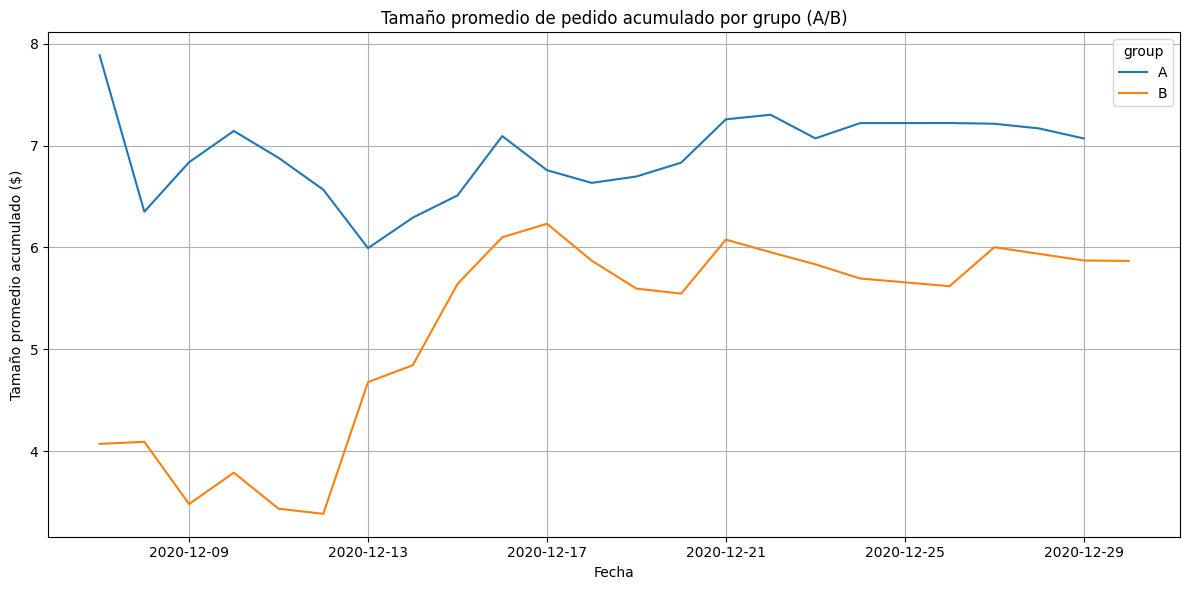

In [73]:
plt.figure(figsize=(12,6))
sns.lineplot(data=promedio_diario,x='event_date',y='tam_prom_aum',hue='group')
plt.title('Tamaño promedio de pedido acumulado por grupo (A/B)')
plt.xlabel('Fecha')
plt.ylabel('Tamaño promedio acumulado ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

Dado que los valores absolutos de ingresos están sesgados por el desequilibrio en el tamaño de los grupos (el grupo A tiene casi tres veces más usuarios que el grupo B), se optó por analizar los ingresos desde una perspectiva relativa, utilizando el ingreso promedio acumulado por usuario.

Este enfoque permite evaluar el comportamiento económico de cada grupo de forma más justa y comparable. Los resultados muestran que el grupo A se mantuvo relativamente constante, con algunos picos tanto positivos como negativos a lo largo del periodo. Estos cambios podrían estar relacionados con promociones puntuales, fluctuaciones en la actividad de los usuarios.

En contraste, el grupo B presentó un crecimiento sostenido en el ingreso promedio acumulado entre el 12 y el 17 de diciembre, lo que sugiere una mayor actividad de compra en ese tramo. Sin embargo, tras este periodo, el crecimiento se estabilizó, sin evidencias de incrementos o descensos significativos hasta el final de la prueba.

Este comportamiento más dinámico del grupo B en la mitad del experimento podría estar relacionado con el impacto inicial del nuevo sistema de recomendaciones, aunque no se sostiene en el tiempo. Por ello, es importante complementarlo con el análisis estadístico formal para determinar si estas diferencias son significativas.

#### Diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A

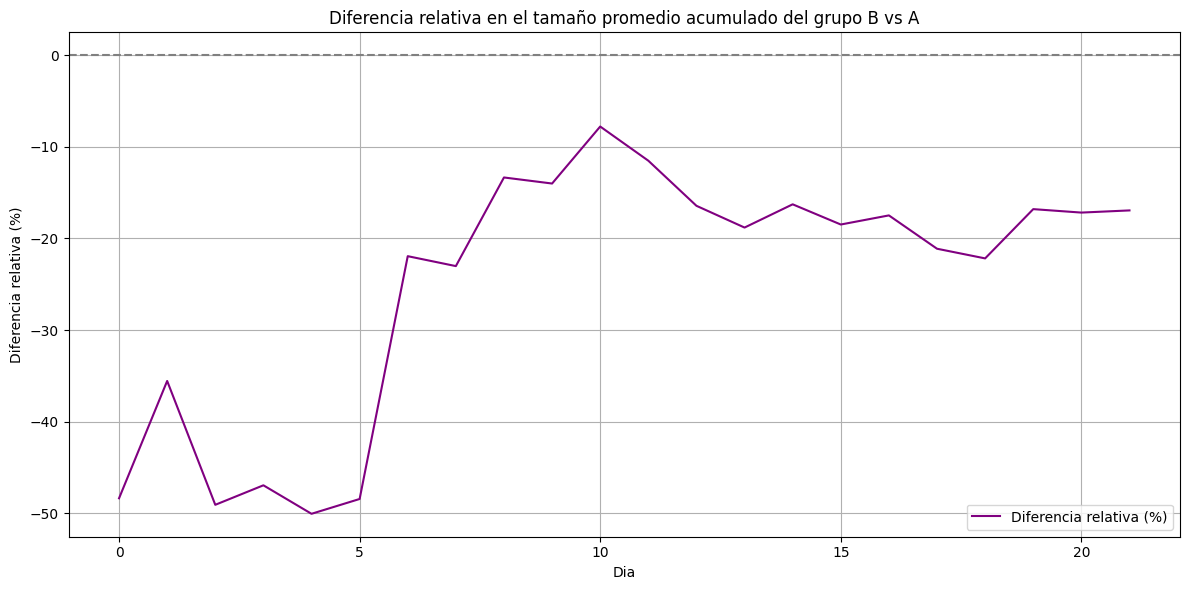

In [74]:
grupo_A = promedio_diario[promedio_diario['group'] == 'A'][['event_date', 'tam_prom_aum']]
grupo_B = promedio_diario[promedio_diario['group'] == 'B'][['event_date', 'tam_prom_aum']]
grupo_A = grupo_A.rename(columns={'tam_prom_aum': 'tam_prom_aum_A'})
grupo_B = grupo_B.rename(columns={'tam_prom_aum': 'tam_prom_aum_B'})
diferencia = pd.merge(grupo_A, grupo_B, on='event_date')

diferencia['diferencia_relativa_%'] = ((diferencia['tam_prom_aum_B'] - diferencia['tam_prom_aum_A']) / diferencia['tam_prom_aum_A']) * 100

plt.figure(figsize=(12,6))
plt.plot(diferencia.index, diferencia['diferencia_relativa_%'], label='Diferencia relativa (%)', color='purple')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Diferencia relativa en el tamaño promedio acumulado del grupo B vs A')
plt.xlabel('Dia')
plt.ylabel('Diferencia relativa (%)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Distribución de eventos por tipo entre los días

In [75]:
event_distribution = events_filtered.groupby(['event_date', 'event_name']).size().unstack(fill_value=0)
event_distribution

event_name,login,product_cart,product_page,purchase
event_date,,,,
2020-12-07,319,81,204,105
2020-12-08,278,71,172,72
2020-12-09,350,93,212,91
2020-12-10,296,79,166,72
2020-12-11,274,62,148,58
2020-12-12,280,68,147,63
2020-12-13,251,52,139,62
2020-12-14,619,183,375,178
2020-12-15,589,191,358,178


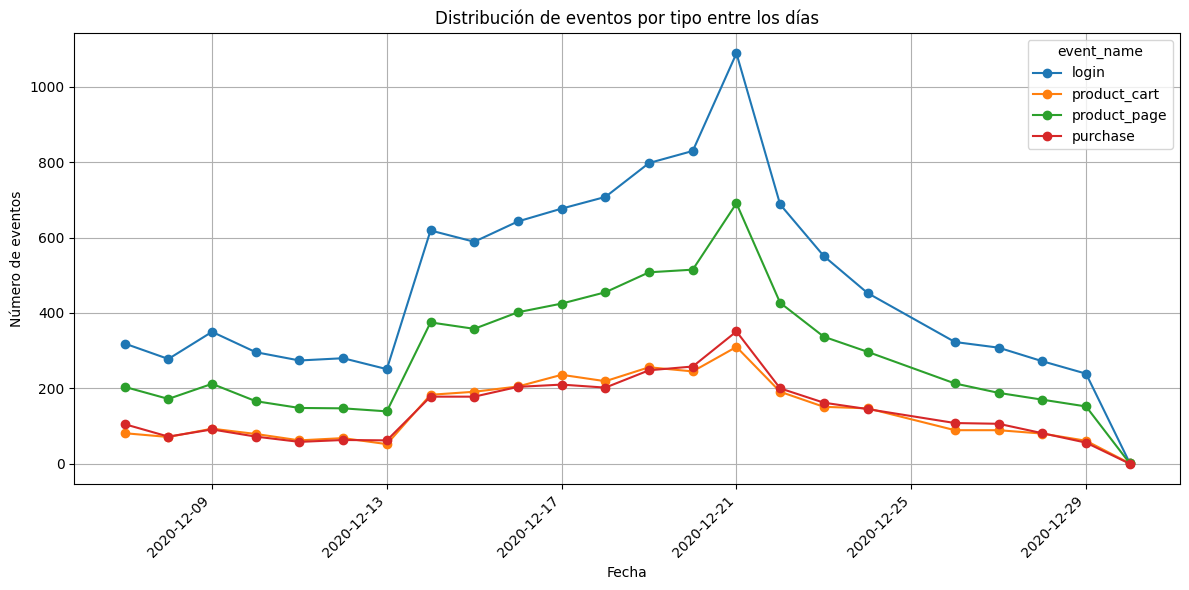

In [76]:

event_distribution.plot(kind='line', figsize=(12,6), marker='o')
plt.title('Distribución de eventos por tipo entre los días')
plt.xlabel('Fecha')
plt.ylabel('Número de eventos')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Al analizar la distribución de los distintos eventos registrados por día a lo largo del periodo del experimento, se observa que las curvas de comportamiento de los eventos (login, product_page, product_cart, purchase) mantienen una estructura paralela. Esto indica que, en términos generales, el patrón de actividad de los usuarios fue similar en ambos grupos, independientemente del tipo de evento.

Una observación importante es que, a partir del 13 de diciembre, se nota un ligero incremento en la actividad general de los usuarios, reflejado en un aumento moderado en todos los eventos. Este repunte puede estar asociado a la cercanía de las festividades, en especial la semana previa a Navidad.

Sin embargo, el pico más alto de actividad se registra el 21 de diciembre, especialmente en los eventos clave del embudo. A partir de esa fecha, se observa un descenso progresivo y significativo en todos los eventos, lo cual coincide con el comportamiento típico de los consumidores en periodos festivos: se anticipan a las fechas especiales y luego disminuyen su actividad digital y de compra.

Este comportamiento no parece estar relacionado con eventos específicos del área de marketing (según el calendario de campañas disponible), sino más bien con factores estacionales. En este caso particular, el lunes 21 de diciembre cae justo antes del fin de semana de Navidad, lo que refuerza la hipótesis de que el pico se debe a las compras anticipadas propias de la temporada.

### Tiempo hasta la primera compra por usuario

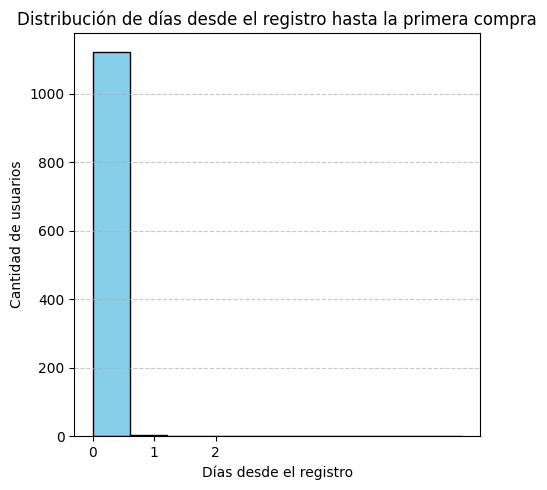

In [77]:
purchase_df = events_filtered[events_filtered['event_name'] == 'purchase']

first_purchase = purchase_df.groupby('user_id')['event_date'].min().reset_index()
first_purchase.columns = ['user_id', 'first_purchase_dt']

user_first_date = events_filtered[['user_id', 'first_date']].drop_duplicates()
df_time_to_purchase = pd.merge(first_purchase, user_first_date, on='user_id')
df_time_to_purchase['days_to_purchase'] = (df_time_to_purchase['first_purchase_dt'] - df_time_to_purchase['first_date']).dt.days


plt.figure(figsize=(5,5))
plt.hist(df_time_to_purchase['days_to_purchase'], bins=10, edgecolor='black', color='skyblue')
plt.title('Distribución de días desde el registro hasta la primera compra')
plt.xlabel('Días desde el registro')
plt.ylabel('Cantidad de usuarios')
plt.xticks(range(0, 3))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Al analizar el intervalo de tiempo entre el registro de un usuario en la plataforma y su primera compra, se observa que la mayoría de las compras ocurren el mismo día del registro. Esto indica un comportamiento inmediato: el usuario se registra, navega y, en caso de decidir comprar, lo hace sin esperar varios días.

Este hallazgo es clave porque implica que las decisiones de compra se toman rápidamente, por lo que la optimización de las primeras interacciones del usuario (como el sistema de recomendaciones o el diseño del embudo) tiene un impacto directo y casi inmediato en la conversión.

No obstante, al comparar el total de usuarios registrados con el número de usuarios que efectivamente completan una compra, se observa que solo alrededor de un tercio de los usuarios realizan una compra. Es decir, la retención y conversión dentro del embudo es baja, lo que justifica plenamente la necesidad de estudiar el comportamiento por etapas, desde la vista del producto hasta la compra.


### Estudio del embudo de eventos

In [78]:
events_filtered['event_name'].value_counts()

event_name
login           10837
product_page     6702
purchase         3210
product_cart     3160
Name: count, dtype: int64

In [79]:
ca = events_filtered.groupby(['event_name'])['user_id'].nunique().reset_index()
ca.columns=('event','n_users')

ordered_events = ['login', 'product_page', 'product_cart', 'purchase']
ca['event']= pd.Categorical(ca['event'], categories= ordered_events, ordered=True)
ca= ca.sort_values('event')


In [80]:
total_users=events_filtered['user_id'].nunique()
ca['proporcion'] = ((ca['n_users']/total_users)*100).round(2)
ca

,event,n_users,proporcion
0,login,3674,99.97
2,product_page,2303,62.67
1,product_cart,1079,29.36
3,purchase,1128,30.69


In [81]:

ca['n_ret'] = (ca['n_users'].shift(1) - ca['n_users'] ).round(2)
ca['%_ret'] = (ca['n_users'] / ca['n_users'].shift(1) * 100).round(2)
ca.loc[ca.index[0], '%_ret'] = 100.0
ca['%_ret_cum'] = (ca['n_users'] / ca['n_users'].iloc[0] * 100).round(2)
ca

,event,n_users,proporcion,n_ret,%_ret,%_ret_cum
0,login,3674,99.97,NaN,100.00,100.00
2,product_page,2303,62.67,1371.0,62.68,62.68
1,product_cart,1079,29.36,1224.0,46.85,29.37
3,purchase,1128,30.69,-49.0,104.54,30.70


Alta actividad inicial: Casi todos los usuarios registrados (99.97%) realizaron al menos un inicio de sesión `login`, lo cual indica una excelente activación inicial.

- Solo el 62.68% de los usuarios logueados visualizaron productos `product_page`, y de esos, menos de la mitad 46.85% los agregaron al carrito `product_cart`.

- El 30.70% del total de usuarios completaron una compra, lo cual puede considerarse una tasa de conversión razonable, pero claramente mejorable.

Anomalía en la tasa de retención purchase: El valor superior al 100% en `%_ret` indica que hubo más usuarios que compraron que los que pasaron por `product_cart`, lo que sugiere que algunos usuarios compraron sin agregar al carrito. Esto puede deberse a una función de compra rápida o un error en la secuencia de eventos.

### Test A/B


In [82]:

ca = events_filtered.groupby(['event_name','group'])['user_id'].nunique().reset_index()
ca.columns=('event','group','n_users')

ordered_events = ['login', 'product_page', 'product_cart', 'purchase']
ca['event']= pd.Categorical(ca['event'], categories= ordered_events, ordered=True)
ca= ca.sort_values('event')

ca=ca.pivot(index='event', columns='group', values='n_users')
ca

group,A,B
event,,
login,2747,927
product_page,1780,523
product_cart,824,255
purchase,872,256


In [83]:

etapas = ['product_page', 'product_cart', 'purchase']
convs_A = [1780, 824, 872]
convs_B = [523, 255, 256]
n_A = 2747
n_B = 927

# Calcular proporciones y prueba z
tabla = []

for etapa, x_A, x_B in zip(etapas, convs_A, convs_B):
    prop_A = x_A / n_A * 100
    prop_B = x_B / n_B * 100
    mejora = prop_B - prop_A

    count = np.array([x_A, x_B])
    nobs = np.array([n_A, n_B])
    stat, pval = proportions_ztest(count, nobs, alternative='larger')
    sig = 'Sí' if pval < 0.05 else 'No'

    tabla.append([
        etapa, x_A, round(prop_A, 2), x_B, round(prop_B, 2),
        round(mejora, 2), round(stat, 4), round(pval, 4), sig
    ])

# Crear DataFrame
resultados_ab = pd.DataFrame(tabla, columns=[
    'etapa', 'users_a', 'Conv_a_%', 'users_b', 'Conv_b_%',
    'B_vs_A', 'Valor_Z', 'p-valor', 'Significativo'
])

display(resultados_ab)


,etapa,users_a,Conv_a_%,users_b,Conv_b_%,B_vs_A,Valor_Z,p-valor,Significativo
0,product_page,1780,64.80,523,56.42,-8.38,4.5613,0.0000,Sí
1,product_cart,824,30.00,255,27.51,-2.49,1.4383,0.0752,No
2,purchase,872,31.74,256,27.62,-4.13,2.3560,0.0092,Sí


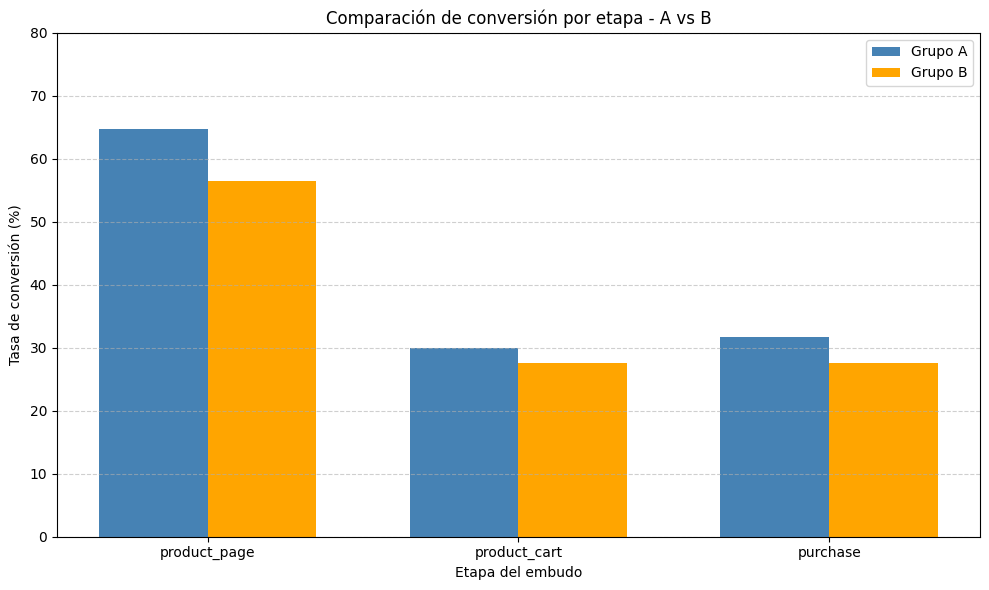

In [84]:
import matplotlib.pyplot as plt

# Gráfico de barras comparando las tasas de conversión
etapas = resultados_ab['etapa']
conv_a = resultados_ab['Conv_a_%']
conv_b = resultados_ab['Conv_b_%']

x = np.arange(len(etapas))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x - width/2, conv_a, width, label='Grupo A', color='steelblue')
plt.bar(x + width/2, conv_b, width, label='Grupo B', color='orange')

plt.xlabel('Etapa del embudo')
plt.ylabel('Tasa de conversión (%)')
plt.title('Comparación de conversión por etapa - A vs B')
plt.xticks(x, etapas)
plt.ylim(0, 80)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Conclusiones 

El nuevo sistema de recomendaciones no solo no mejoró el embudo de conversión, sino que tuvo un impacto negativo significativo en al menos dos de las tres etapas clave. Esto no cumple con los criterios esperados del experimento (un aumento de al menos el 10% en cada etapa) y por lo tanto, no se recomienda su implementación en su estado actual.

- En todas las etapas del embudo, el grupo B muestra peores tasas de conversión en comparación con el grupo A. Las diferencias son estadísticamente significativas en la etapa de vista de productos `product_page` y en compras `purchase`, con p-valores < 0.05.

- En la etapa intermedia `product_cart`, la diferencia no fue significativa, aunque también negativa.


# Recomendaciones

1. No implementar el nuevo sistema de recomendaciones: El sistema experimental mostró un desempeño inferior al actual en métricas clave del embudo, con diferencias estadísticamente significativas. Su adopción podría afectar negativamente las conversiones y los ingresos de la **Tienda en línea Internacional**.

2. Analizar las causas del bajo rendimiento:
Es importante realizar un análisis técnico del nuevo sistema.

- ¿Está mostrando productos relevantes para el usuario?
- ¿Está interrumpiendo la navegación o hay complejidad en el proceso?
- ¿Se adapta correctamente a los distintos dispositivos y tipos de usuarios?

3. Optimizar la primera interacción:
Dado que la mayoría de los usuarios realizan sus compras el mismo día del registro, es importante que el sistema de recomendaciones funcione desde el primer momento. Cualquier error o mal diseño puede tener un impacto inmediato y directo en las tasas de conversión.

4. Realizar pruebas más equilibradas: 
El experimento tuvo un desbalance entre los grupos A y B. Para futuras pruebas A/B se recomienda asegurar una asignación equitativa entre grupos.

5. Explorar alternativas personalizadas:
En lugar de un cambio radical del sistema de recomendaciones, se podría considerar:

- Probar pequeños ajustes al sistema actual (test A/B ).
- Usar sistemas combinando recomendaciones populares y recomendaciones personalizadas.
- Adaptar las recomendaciones al comportamiento temprano del usuario.



**Todo un Éxito :)**